# Matplotlib Box Plots

**df.plot(kind = 'box')**

## Statistical Analysis

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst Data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [4]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [5]:
df_DA_US['salary_year_avg'].sample(10)

416029    149508.5
215964    105000.0
473342     39250.0
538006     70000.0
262306     90000.0
130978    100000.0
431891     70000.0
102436     87000.0
725014     67818.0
175735     60000.0
Name: salary_year_avg, dtype: float64

<Axes: >

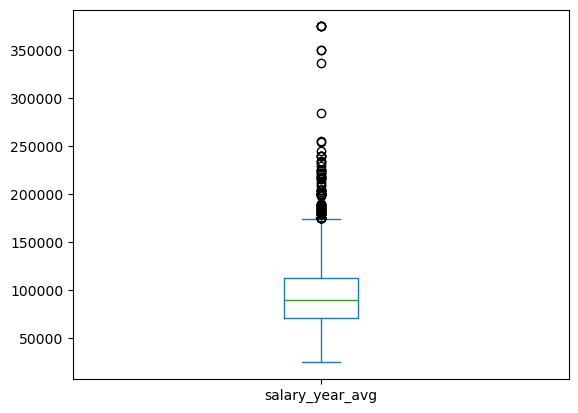

In [10]:
df_DA_US['salary_year_avg'].plot(kind='box')

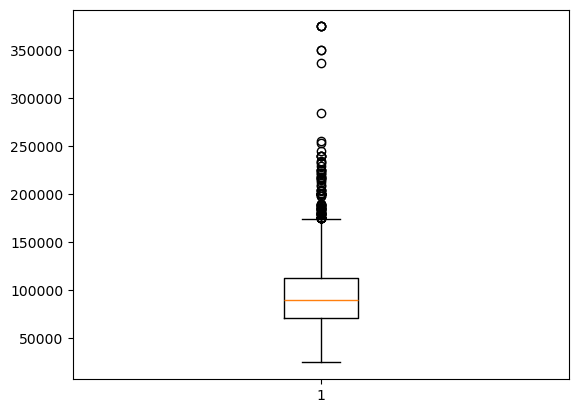

In [9]:
plt.boxplot(df_DA_US['salary_year_avg'])
plt.show()

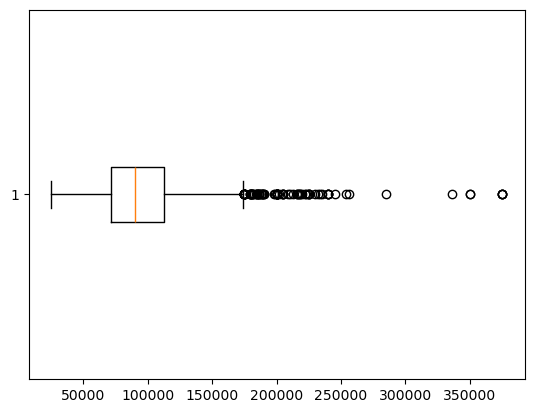

In [11]:
# we'd rather have the box in a horizontal axis, so we add the parameter vert=False
plt.boxplot(df_DA_US['salary_year_avg'], vert=False)
plt.show()

### Quick explanation of the Box plot
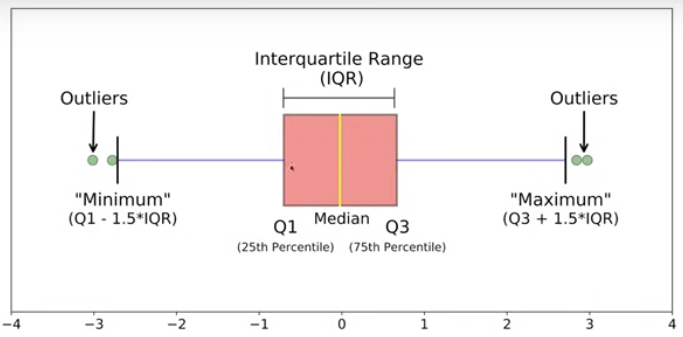

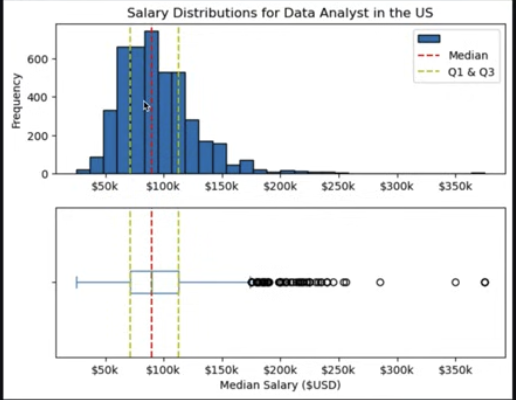

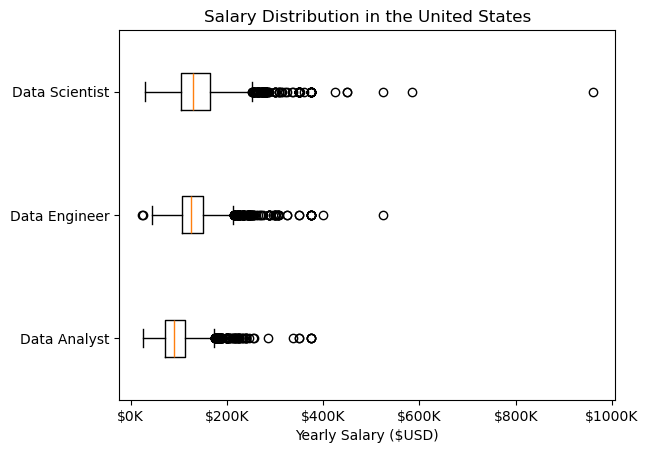

In [24]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter the data to appropriate job_titles
# Only get Data Analyst jobs
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy() 
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels=job_titles, vert=False) 
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca() #get current axis ... this is to clean up the x axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f'${int(x/1000)}K'))
plt.show()

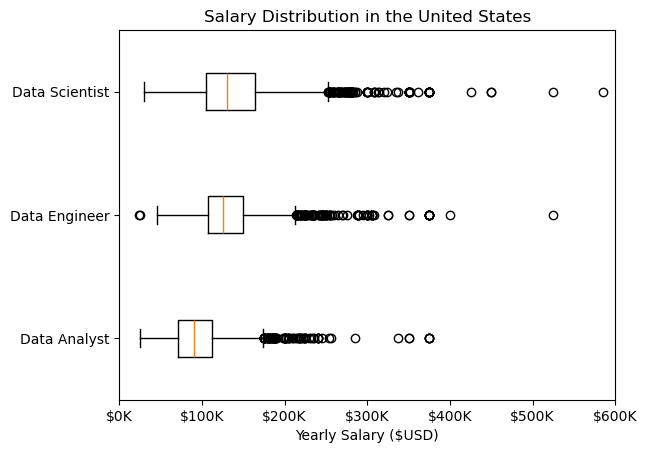

In [25]:
# to look better into the data that matters, we are going to limit the range for the x values to 600K -  we'll do this using xlim
plt.boxplot(job_list, tick_labels=job_titles, vert=False) 
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca() #get current axis ... this is to clean up the x axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f'${int(x/1000)}K'))
plt.xlim(0, 600_000)
plt.show()

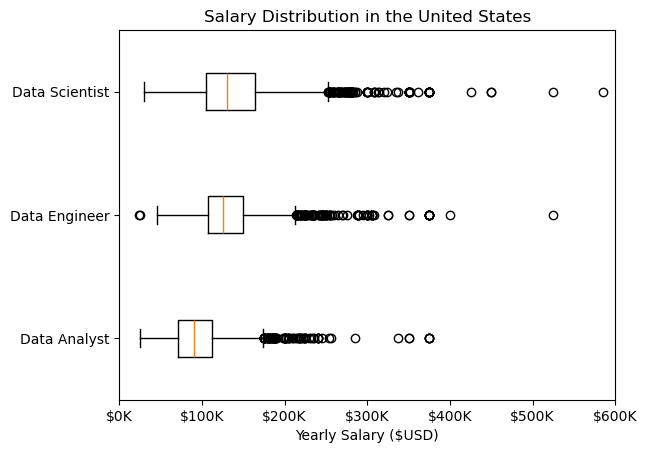

In [ ]:
# to look better into the data that matters, we are going to limit the range for the x values to 600K -  we'll do this using xlim
plt.boxplot(job_list, tick_labels=job_titles, vert=False) 
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca() #get current axis ... this is to clean up the x axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f'${int(x/1000)}K'))
plt.xlim(0, 600_000)
plt.show()

### Insights from the Box plot above
- Note how bigger the Data Scientist's box is, compared to the other two data professions. It also has a bigger spread if we compare the outliers.
- Data Scientists are more likely to have higher salaries than Data Engineers.
- Data Analysts are more likely to have the lower salaries of the 3 professions



